### Requirements

In [1]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Create a csv file for manual data collection (individual Twitter accounts)

In [89]:
file_list = glob.glob('./twitter_data/*_indi_*.csv')
hospital_rank = []
hospital_no = re.compile(r'\d+')
for i in range(len(file_list)):
    hospital_rank.append(hospital_no.findall(file_list[i])[0])

In [122]:
handles = []
for i in file_list:
    j = file_list.index(i)
    if re.findall(r'@', i):
        handles.append(re.findall(r'@\w+', file_list[j])[0].strip('@'))
    else:
        handles.append(re.sub(r'\d+_', '', re.findall(r'\d+_\w+', file_list[j])[0]))

In [129]:
data = pd.DataFrame()
hospital_code = pd.Series(hospital_rank)
data['Hospital Code'] = hospital_code.values
indi_handles = pd.Series(handles)
data['Handles'] = indi_handles.values
data.to_csv('./indi_handles.csv')

### Import the data back to the notebook

In [5]:
account_type = pd.read_csv('./indi_handles.csv', index_col = 0)

In [6]:
clean_data = account_type[(account_type.Degree == 'PhD') | (account_type.Degree == 'MD') | 
                          (account_type.Degree == 'MD, PhD') | (account_type.Degree == 'ABD')]
clean_data['Degree'][clean_data['Degree'] == 'ABD'] = 'PhD'

/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

### Number of MD, PhD, and MD/PhD each hospital has that uses Twitter

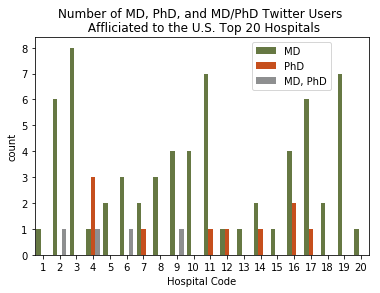

In [7]:
palette = ['#69813A', '#E24301', '#8E8F90']
current_palette = sns.color_palette(palette)
sns.countplot(x = "Hospital Code", hue = 'Degree', data = clean_data, palette = current_palette)
plt.legend(loc = 'upper right', bbox_to_anchor=(0.9, 1))
plt.title('Number of MD, PhD, and MD/PhD Twitter Users \n Affliciated to the U.S. Top 20 Hospitals')
plt.show()

In [202]:
sorted_data = clean_data.sort_values('Hospital Code')
wide_data = pd.DataFrame({'Hospital Code': [i for i in range(1, 21)], 'Handle Number': np.nan, 'MD Number': np.nan,
                          'PhD Number': np.nan})

In [214]:
def calculate_total_number(hospital_code):
    total_number = 0
    for i in range(len(sorted_data)):
        if sorted_data['Hospital Code'].iloc[i] == hospital_code:
            total_number += 1
    return total_number

def calculate_MD_number(hospital_code):
    MD_number = 0
    for i in range(len(sorted_data)):
        if sorted_data['Hospital Code'].iloc[i] == hospital_code:
            if (sorted_data['Degree'].iloc[i] == 'MD')|(sorted_data['Degree'].iloc[i] == 'MD, PhD'):
                MD_number += 1
    return MD_number

def calculate_PhD_number(hospital_code):
    PhD_number = 0
    for i in range(len(sorted_data)):
        if sorted_data['Hospital Code'].iloc[i] == hospital_code:
            if (sorted_data['Degree'].iloc[i] == 'PhD')|(sorted_data['Degree'].iloc[i] == 'MD, PhD'):
                PhD_number += 1
    return PhD_number
for i in range(20):
    j = i + 1
    if wide_data['Hospital Code'][i] == j:
        wide_data['Handle Number'][i] = calculate_total_number(j)
        wide_data['MD Number'][i] = calculate_MD_number(j)
        wide_data['PhD Number'][i] = calculate_PhD_number(j)
wide_data.corr()

/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/reesetou/anaconda2/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Handle Number,Hospital Code,MD Number,PhD Number
Handle Number,1.000000,-0.111615,0.942679,0.326457
Hospital Code,-0.111615,1.000000,-0.115143,-0.190885
MD Number,0.942679,-0.115143,1.000000,0.022452
PhD Number,0.326457,-0.190885,0.022452,1.000000


### Scatter plot between hospital ranking and total number of individual Twitter accounts

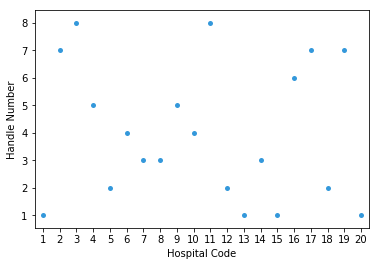

In [231]:
sns.stripplot(data = wide_data, x = 'Hospital Code', y = 'Handle Number', color = "#3498db")
plt.show()

### Scatter plot between hospital ranking and number of MD's Twitter accounts

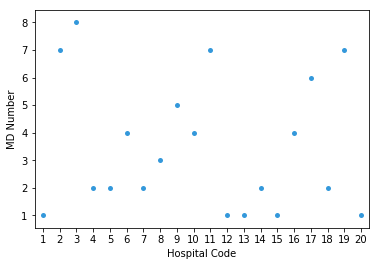

In [232]:
sns.stripplot(data = wide_data, x = 'Hospital Code', y = 'MD Number', color = "#3498db")
plt.show()

### Scatter plot between hospital ranking and total number of PhD's Twitter accounts

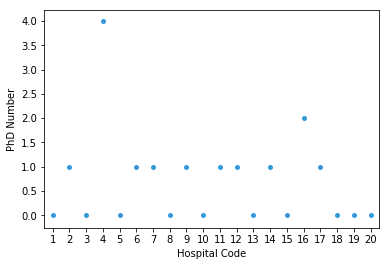

In [233]:
sns.stripplot(data = wide_data, x = 'Hospital Code', y = 'PhD Number', color = "#3498db")
plt.show()